In [1]:
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.tree import (DecisionTreeRegressor, export_graphviz)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor, 
                              ExtraTreesRegressor, AdaBoostRegressor)
from IPython.display import Image

### import data

In [2]:
data = pd.read_csv('../../Data/WeatherOutagesAllJerry.csv')

In [3]:
data = data.dropna(how = 'all')
data = data.fillna(0)
data = data.round(4)

In [4]:
natural = data['natural'] = data.Trees + data.Animals + data.Lightning
pd.set_option('display.max_columns', 500)
data.head(5)

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Day_length_hr,Max_temp_F,Avg_Temp_F,Min_temp_F,Max_humidity_percent,Avg_humidity_percent,Min_humidity_percent,Max_visibility_mi,Avg_visibility_mi,Min_visibility_mi,Max_windspeed_mph,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado,natural
0,9/11/00,0.0,0.0,0.0,0.0,0.0,12.7833,66.0,58.0,50.0,100.0,89.0,58.0,10.0,6.0,0.0,8.0,2.0,9.0,0.01,Fog,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/12/00,2.0,1.0,0.0,1.0,0.0,12.7167,75.0,62.0,52.0,100.0,69.0,33.0,10.0,10.0,7.0,8.0,4.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9/13/00,1.0,1.0,0.0,0.0,0.0,12.6667,77.0,64.0,54.0,97.0,74.0,52.0,10.0,10.0,10.0,16.0,7.0,25.0,0.00,Fog,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/00,0.0,0.0,0.0,0.0,0.0,12.6167,84.0,71.0,60.0,87.0,66.0,39.0,10.0,10.0,10.0,17.0,12.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9/15/00,1.0,1.0,0.0,0.0,0.0,12.5500,73.0,66.0,59.0,97.0,79.0,53.0,10.0,10.0,10.0,12.0,5.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data['Total_outages'].max()

49.0

In [6]:
data['natural'].max()

47.0

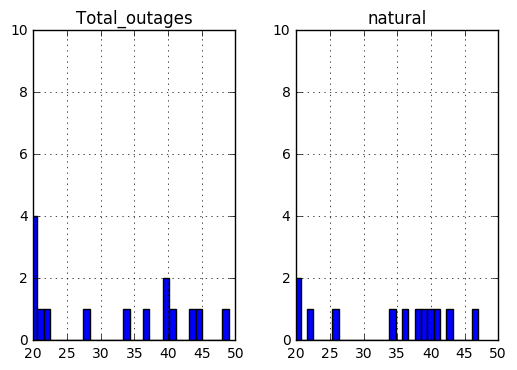

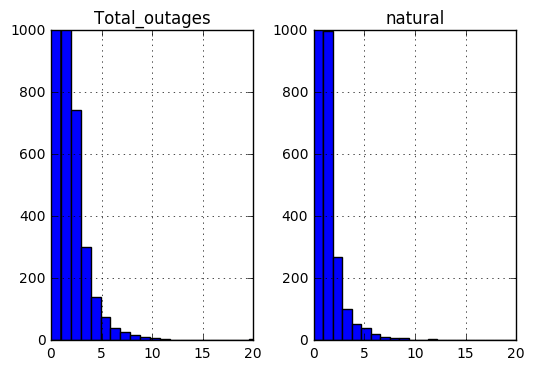

In [7]:
#data[['Total_outages','natural']].hist(bins=100)
#plt.xlim([0,20])

for array in data[['Total_outages','natural']].hist(bins=50):
    for subplot in array:
        subplot.set_xlim((20,50))
        subplot.set_ylim((0,10))
        
for array in data[['Total_outages','natural']].hist(bins=50):
    for subplot in array:
        subplot.set_xlim((0,20))
        subplot.set_ylim((0,1000))
        
#0-2, 3-8, >9

In [8]:
#data[['Max_temp_F','Avg_Temp_F','Min_temp_F']].plot()
#data[['Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent']].plot()

In [9]:
#data[['Max_visibility_mi']].plot()

In [10]:
#data[['Avg_visibility_mi']].plot()

In [11]:
data.head(2)

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Day_length_hr,Max_temp_F,Avg_Temp_F,Min_temp_F,Max_humidity_percent,Avg_humidity_percent,Min_humidity_percent,Max_visibility_mi,Avg_visibility_mi,Min_visibility_mi,Max_windspeed_mph,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado,natural
0,9/11/00,0.0,0.0,0.0,0.0,0.0,12.7833,66.0,58.0,50.0,100.0,89.0,58.0,10.0,6.0,0.0,8.0,2.0,9.0,0.01,Fog,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/12/00,2.0,1.0,0.0,1.0,0.0,12.7167,75.0,62.0,52.0,100.0,69.0,33.0,10.0,10.0,7.0,8.0,4.0,9.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
data = data[['Total_outages','Day_length_hr','Max_temp_F','Avg_humidity_percent',
             'Avg_visibility_mi','Max_windspeed_mph', 'Max_windgust_mph','Precipitation_in',
             'Event_snow', 'Event_thunderstorm', 'Event_Hail','Event_Tornado']]

In [13]:
data.head(2)

,Total_outages,Day_length_hr,Max_temp_F,Avg_humidity_percent,Avg_visibility_mi,Max_windspeed_mph,Max_windgust_mph,Precipitation_in,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado
0,0.0,12.7833,66.0,89.0,6.0,8.0,9.0,0.01,0.0,0.0,0.0,0.0
1,2.0,12.7167,75.0,69.0,10.0,8.0,9.0,0.00,0.0,0.0,0.0,0.0


In [14]:
data

,Total_outages,Day_length_hr,Max_temp_F,Avg_humidity_percent,Avg_visibility_mi,Max_windspeed_mph,Max_windgust_mph,Precipitation_in,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado
0,0.0,12.7833,66.0,89.0,6.0,8.0,9.0,0.01,0.0,0.0,0.0,0.0
1,2.0,12.7167,75.0,69.0,10.0,8.0,9.0,0.00,0.0,0.0,0.0,0.0
2,1.0,12.6667,77.0,74.0,10.0,16.0,25.0,0.00,0.0,0.0,0.0,0.0
3,0.0,12.6167,84.0,66.0,10.0,17.0,9.0,0.00,0.0,0.0,0.0,0.0
4,1.0,12.5500,73.0,79.0,10.0,12.0,9.0,0.00,0.0,0.0,0.0,0.0
5,0.0,12.5000,69.0,85.0,10.0,8.0,9.0,0.00,0.0,0.0,0.0,0.0
6,2.0,12.4333,72.0,85.0,10.0,7.0,9.0,0.00,0.0,0.0,0.0,0.0
7,1.0,12.3833,70.0,90.0,9.0,13.0,9.0,0.00,0.0,0.0,0.0,0.0
8,2.0,12.3333,71.0,87.0,9.0,10.0,9.0,0.05,0.0,0.0,0.0,0.0
9,0.0,12.2667,64.0,94.0,5.0,7.0,22.0,0.04,0.0,0.0,0.0,0.0


In [15]:
train,test=train_test_split(data,test_size=0.2,random_state=567)

In [16]:
x_train = train.iloc[:,1:]

In [17]:
x_train = train.iloc[:,1:]
y_train = train.Total_outages

x_test = test.iloc[:,1:]
y_test = test.Total_outages

In [18]:
x_train.head(2)

,Day_length_hr,Max_temp_F,Avg_humidity_percent,Avg_visibility_mi,Max_windspeed_mph,Max_windgust_mph,Precipitation_in,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado
2246,9.7667,58.0,90.0,7.0,23.0,30.0,0.87,0.0,0.0,0.0,0.0
4170,10.0667,48.0,82.0,10.0,15.0,12.0,0.03,0.0,0.0,0.0,0.0


In [19]:
# data normalization
x_train_nor = pd.DataFrame(preprocessing.normalize(x_train.iloc[:,0:7])).join(train.iloc[:,8:])
x_train_nor = x_train_nor.fillna(0)
x_test_nor = pd.DataFrame(preprocessing.normalize(x_test.iloc[:,0:7])).join(test.iloc[:,8:])
x_test_nor = x_test_nor.fillna(0)

In [20]:
# data standardization
x_train_std = pd.DataFrame(preprocessing.scale(x_train.iloc[:,0:7])).join(train.iloc[:,8:])
x_train_std = x_train_std.fillna(0)
x_test_std = pd.DataFrame(preprocessing.scale(x_test.iloc[:,0:7])).join(test.iloc[:,8:])
x_test_std = x_test_std.fillna(0)

In [21]:
x_train_nor.size

49841

In [22]:
y_test.size

1133

In [23]:
x_train_nor

,0,1,2,3,4,5,6,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado
0,0.085534,0.507949,0.788197,0.061304,0.201428,0.262732,0.007619,0.0,0.0,0.0,0.0
1,0.102752,0.489940,0.836981,0.102071,0.153106,0.122485,0.000306,0.0,0.0,0.0,0.0
2,0.148184,0.605972,0.731346,0.104478,0.146269,0.208956,0.000000,0.0,0.0,0.0,0.0
3,0.156041,0.507840,0.716185,0.130215,0.234388,0.364603,0.000000,0.0,0.0,0.0,0.0
4,0.121538,0.488870,0.804599,0.101848,0.183326,0.234250,0.000611,0.0,0.0,0.0,0.0
5,0.105009,0.599536,0.730343,0.109006,0.163510,0.239814,0.000000,0.0,0.0,0.0,0.0
6,0.092679,0.437163,0.786894,0.069946,0.244811,0.340987,0.000262,0.0,0.0,0.0,0.0
7,0.156899,0.755866,0.588987,0.098164,0.127614,0.176696,0.000000,0.0,0.0,0.0,0.0
8,0.098230,0.506083,0.727494,0.105434,0.126521,0.421735,0.000000,0.0,0.0,0.0,0.0
9,0.081667,0.345205,0.891780,0.076712,0.124657,0.239726,0.000384,0.0,0.0,0.0,0.0


### Decision Tree 

In [24]:
dt = DecisionTreeRegressor(criterion='mse',max_leaf_nodes=6)

clf_nor = dt.fit(x_train_nor,y_train)

y_train_pred_nor = dt.predict(x_train_nor)
y_test_pred_nor = dt.predict(x_test_nor)

print("Train error for normalized data",mean_squared_error(y_train,y_train_pred_nor))
print("Test error for normalized data",mean_squared_error(y_test,y_test_pred_nor))

tree_dot_nor = export_graphviz(clf_nor,out_file = 'tree_all_nor.dot')

Train error for normalized data 3.53894503501
Test error for normalized data 4.26518105984


In [25]:
clf_std = dt.fit(x_train_std,y_train)

y_train_pred_std = dt.predict(x_train_std)
y_test_pred_std = dt.predict(x_test_std)

print("Train error for standardized data",mean_squared_error(y_train,y_train_pred_std))
print("Test error for standardized data",mean_squared_error(y_test,y_test_pred_std))

tree_dot_std = export_graphviz(clf_std,out_file = 'tree_all_std.dot')

Train error for standardized data 3.36106728342
Test error for standardized data 2.66105056505


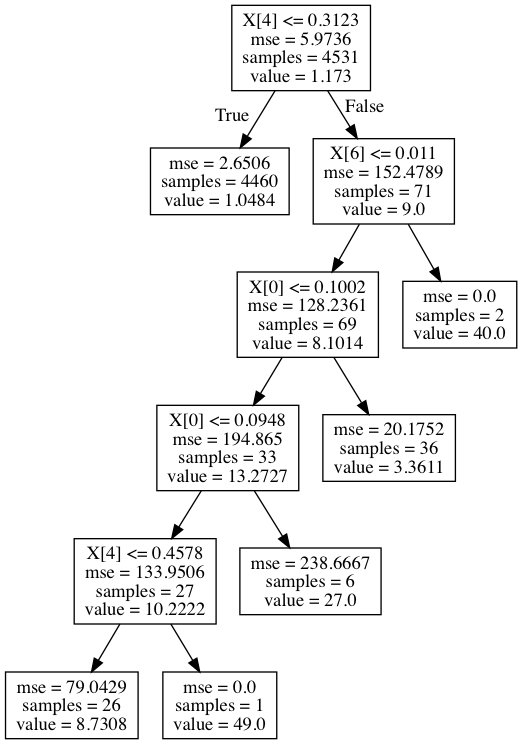

In [26]:
graph = pydotplus.graphviz.graph_from_dot_file('tree_all_nor.dot')
Image(graph.create_png())

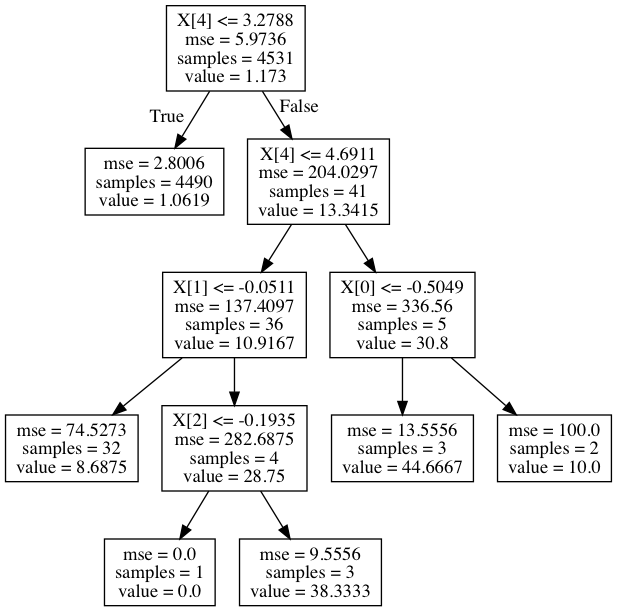

In [27]:
graph = pydotplus.graphviz.graph_from_dot_file('tree_all_std.dot')
Image(graph.create_png())

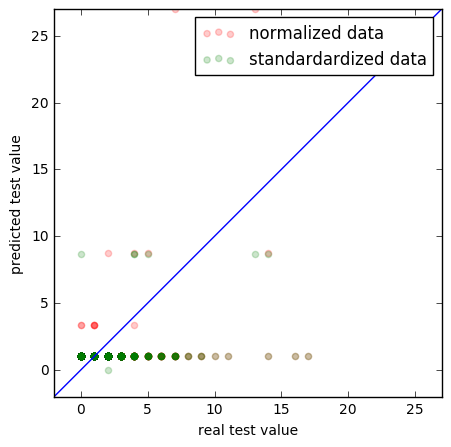

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_test_pred_nor,alpha=0.2,color='red',label='normalized data')
plt.scatter(y_test,y_test_pred_std,alpha=0.2,color='green',label='standardardized data')
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(-5,30),np.arange(-5,30))
plt.xlim([-2,27])
plt.ylim([-2,27])
plt.legend()

### Advanced Tree Methods

In [29]:
rf = RandomForestRegressor(n_estimators=100)
et = ExtraTreesRegressor(n_estimators=100)
ab = AdaBoostRegressor()
bg = BaggingRegressor()

Train error for standardized data using RandomForest is 0.624891077601
Test error for standardized data using RandomForest is 2.76007513239
Train error for standardized data using ExtraTrees is 0.000110350915913
Test error for standardized data using ExtraTrees is 2.86579048985
Train error for standardized data using AdaBoost is 11.9073759211
Test error for standardized data using AdaBoost is 12.0720138551
Train error for standardized data using Bagging is 0.68403669781
Test error for standardized data using Bagging is 3.0040423654


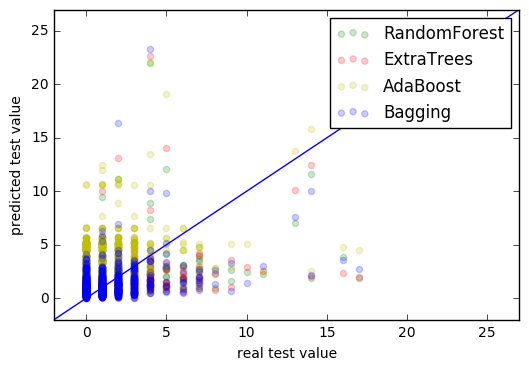

In [30]:
for method, color_, label_ in [(rf,'g','RandomForest'), (et,'r','ExtraTrees'),(ab,'y','AdaBoost'),(bg,'b','Bagging')]:
    clf_std = method.fit(x_train_std,y_train)

    y_train_pred_std = method.predict(x_train_std)
    y_test_pred_std = method.predict(x_test_std)

    print("Train error for standardized data using %s is" % (label_),mean_squared_error(y_train,y_train_pred_std))
    print("Test error for standardized data using %s is" % (label_),mean_squared_error(y_test,y_test_pred_std))
    
    plt.scatter(y_test,y_test_pred_std,alpha=0.2,color=color_,label=label_)
    
plt.xlabel('real test value')
plt.ylabel('predicted test value')
plt.plot(np.arange(-5,30),np.arange(-5,30))
plt.xlim([-2,27])
plt.ylim([-2,27])
plt.legend()